#  **ICT303 - Assignment 1**

**Your name: Thien Twee Zian**

**Student ID: 34664971**

**Email: tweezian@gmail.com**


# Initial Setup

**Data Class**

The Data class manages the data transformation and loading process for the model training and testing phases. It includes two primary functions:

1.   get_transforms(width, height): This function applies necessary transformations to the input data, including resizing to the specified dimensions, normalization, and conversion to tensor format. These transformations ensure the data is properly formatted for the model.
2.   data_loader_to_numpy(loader): This function converts the data loaded by the PyTorch DataLoader into a NumPy array, enabling easier manipulation and compatibility with libraries that rely on NumPy.

Additionally, this class defines the paths to the datasets, simplifying data access throughout the project. Although the dataset paths are declared here, data initialization happens within each question due to varying input sizes (e.g., 32x32 vs. 224x224).

The data is hosted in a GitHub repository, provided via a link at the top of the source code. This ensures the data is consistently downloaded during every run for training and testing purposes.

**Data Processing done in the Questions**

The datasets are loaded using PyTorch's ImageFolder, where images from the specified directories are assigned labels based on their subfolders. Data loaders are created to efficiently iterate over the images in batches, with the training data shuffled to prevent the model from learning any particular order.

The data is then converted from PyTorch data loaders into NumPy arrays to allow further processing. The labels for the training and testing sets are one-hot encoded, converting them into vectors that represent the eight possible classes. This step is necessary for the multi-class classification problem.

Finally, the original training data is split into two sets: 80% is used for training, while 20% is used for validation, helping evaluate the model's performance during training. A fixed random state ensures that this split is reproducible. This process prepares the image data for use in a neural network.

**Tester Class**

The Tester class is designed for model evaluation, focusing on two key tasks:

1.   Precision Calculation: Computes the precision of the trained models, providing a metric for the model's performance.

2.   Confusion Matrix Plotting: Visualizes the model's performance by plotting the confusion matrix, giving insights into how well the model distinguishes between different classes.



# **Question 1**

## **Initial MLP Design**

The initial design for the Multilayer Perceptron (MLP) consists of three hidden layers. For each hidden layer, the ReLU (Rectified Linear Unit) activation function is applied, as it was found to be the most effective in prior coursework, helping the model learn complex patterns without vanishing gradient issues.

To address the risk of overfitting, a dropout layer is added after each hidden layer. Dropout helps by randomly deactivating a fraction of neurons during training, forcing the model to learn more robust and generalized features rather than memorizing the training data.

The final layer is a fully connected layer with softmax activation, consisting of 8 neurons, corresponding to the 8 distinct labels in the classification task. The softmax function is used to convert the outputs into probability distributions across the 8 classes, ensuring the model's predictions are interpretable as probabilities.

This architecture aims to balance complexity with generalization, allowing the MLP to learn effectively while minimizing the chance of overfitting.

## **Hyper-parameter Testing**

To identify the optimal hyperparameters for the model, a series of tests were conducted utilizing the following configuration:

  * Number of Epochs: 5

  This parameter defines the number of complete passes through the training dataset. A smaller number of epochs allows for quick evaluations of model performance without significant computational costs.

  * Batch Size: 16

  The batch size determines how many samples are processed before the model's internal parameters are updated. A batch size of 16 strikes a balance between efficient memory usage and stable gradient estimates.

  * Learning Rate: 1e-04

  The learning rate controls the size of the steps taken during optimization. A learning rate of 1e-04 was selected to ensure gradual convergence towards the optimal solution without overshooting.

  * Optimizer: Adam

  The Adam optimizer was chosen for its ability to adaptively adjust learning rates based on the first and second moments of the gradients. This adaptive approach often leads to faster convergence and improved model performance.

  * Loss Function: Categorical Crossentropy

  Categorical crossentropy is used as the loss function to quantify the difference between the predicted probabilities and the actual class labels. It is particularly suitable for multi-class classification tasks, such as this one with multiple labels.

This configuration was used to facilitate rapid experimentation and fine-tuning, allowing for subsequent adjustments based on initial results and model performance.

### **Hidden Layer Selection**

The hidden layers were tested with a minimum of 512 neurons, given the complexity of the image classification problem. Subsequent layers followed an exponential increase in size, doubling the number of neurons. A special test case was included with 1536 neurons in the first layer (L1), based on studies suggesting that the optimal size for a hidden layer often lies between the sizes of the input and output layers.

The testing revealed a clear relationship between neuron size and test loss. When the neuron size was too small, the model exhibited a high test loss, indicating underfitting and an inability to capture the complexity of the data. Increasing the number of neurons generally led to improvements in the loss rate, enhancing the model's capacity to learn from the training data.

However, it was noted that as the number of neurons increased, the computational time also rose significantly. This trade-off meant that while reducing test loss was beneficial, it came at the cost of longer training times.

Furthermore, once the neuron count reached a certain threshold, improvements in the loss rate began to plateau. This plateau suggests that, beyond a certain point, adding more neurons yields diminishing returns in model performance. The continued increase in computational time without significant gains in accuracy indicated that an optimal balance must be struck between neuron size, training efficiency, and model performance.

Based on the results, the final architecture was set as follows:

1.   4096 neurons in the first hidden layer,
2.   2048 neurons in the second hidden layer,
3.   1024 neurons in the third hidden layer.


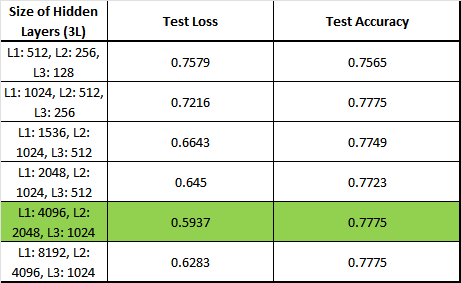

### **Optimizer Selection**

Once the optimal number of neurons was determined, further testing was conducted to identify the most suitable optimizer for training the model. Various optimizers were evaluated based on their ability to efficiently minimize the loss and improve model performance.

From these tests, the Adam (Adaptive Moment Estimation) optimizer consistently produced the best results. Adam combines the advantages of both AdaGrad (which works well for sparse gradients) and RMSProp (which adapts the learning rate based on recent gradients), making it particularly effective for the complex, high-dimensional nature of the image classification problem. Adam's built-in adaptive learning rate mechanism enabled faster convergence while maintaining model stability.

As a result, Adam was selected as the optimizer for all subsequent training runs, ensuring optimal performance and efficient learning.

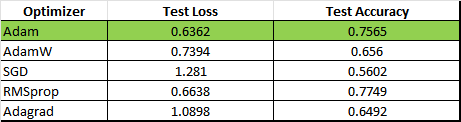

### **Learning Rate Selection**

To ensure effective training of the model, a series of tests were conducted to determine the optimal learning rate. The learning rate plays a crucial role in controlling how quickly the model updates its weights during training, and selecting an appropriate rate is essential for achieving convergence without overshooting the minimum of the loss function.

Each learning rate was evaluated based on its impact on training stability, convergence speed, and overall model performance. The results indicated that a learning rate of 1e-4 provided the best balance, allowing the model to converge steadily while minimizing the risk of oscillations or divergence.

The experiments demonstrated that if the learning rate is set too high, the model may experience erratic loss behavior and fail to converge, resulting in suboptimal accuracy. Conversely, if the learning rate is too low, the training process becomes excessively slow, leading to prolonged convergence times without significant performance improvements.

Ultimately, the sweet spot for the learning rate was found to be around 1e-04, where the model exhibited stable training dynamics and effective learning, ensuring both timely convergence and enhanced performance.

This optimal learning rate was then utilized in all subsequent training sessions, facilitating efficient and effective learning for the model.

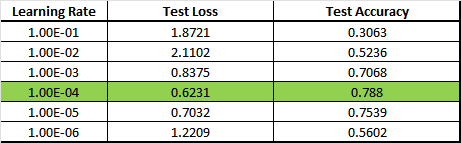

## **Training**

With the optimal hyperparameters established, the model training commenced. To enhance the training process and ensure efficient learning, three key callbacks were implemented:

1. TensorBoard: This callback was utilized for logging training metrics, allowing for comprehensive visualization of the training process. TensorBoard provides valuable insights into loss curves and other performance metrics, facilitating monitoring and debugging.

2. Reduce Learning Rate on Plateau: This callback automatically reduces the learning rate when the validation loss plateaus. By dynamically adjusting the learning rate, the model can escape local minima and continue improving performance, thereby enhancing training efficiency.

3. Early Stopping: This callback monitors the validation loss and halts training if no significant improvement is observed over a specified number of epochs (in this case, 5 epochs). This approach prevents overfitting and conserves computational resources by stopping training when the model performance stagnates.

With the implementation of early stopping, the model was trained for a maximum of 50 epochs, effectively avoiding unnecessary computational costs. In our tests, the model concluded training at epoch 31, indicating that the early stopping mechanism successfully identified the optimal point of convergence.

This combination of callbacks not only streamlined the training process but also contributed to a more robust and efficient model.



### **TensorBoard Graphs**

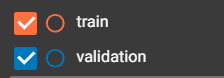

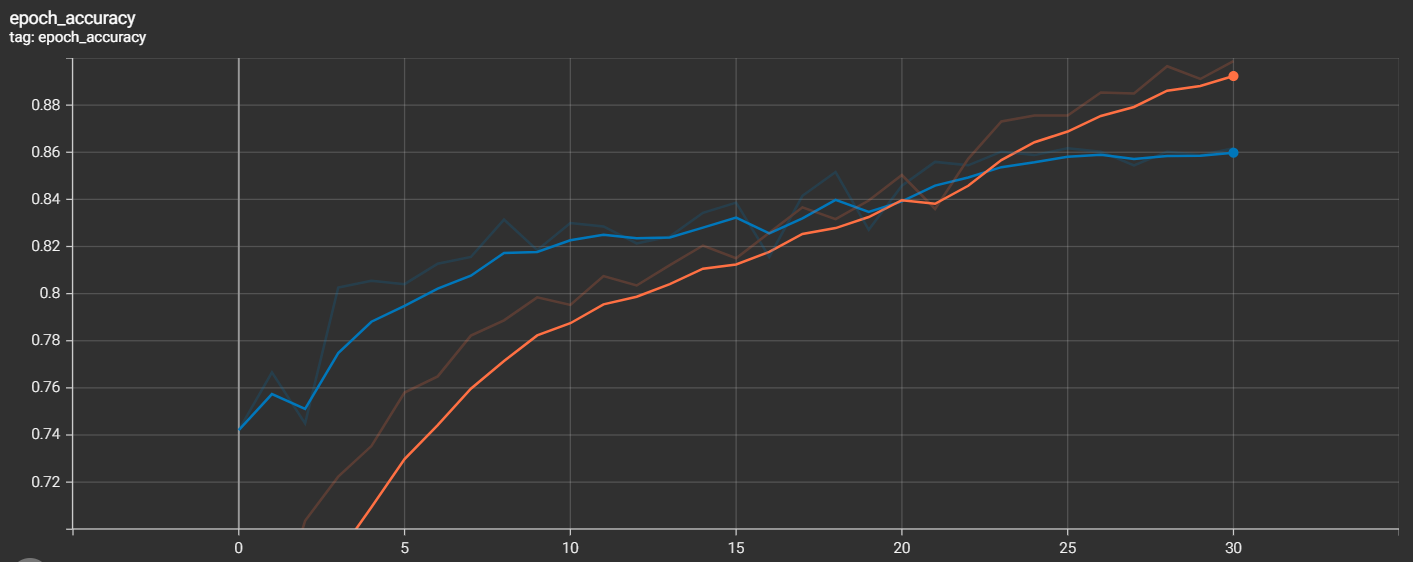

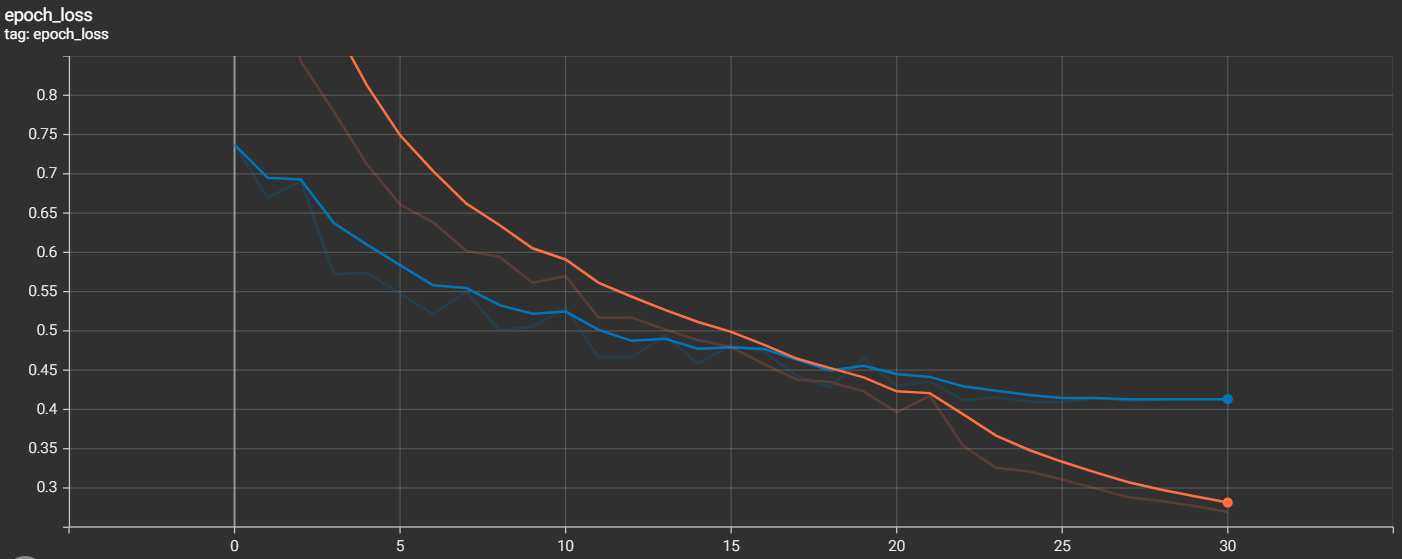

## **Evaluation**

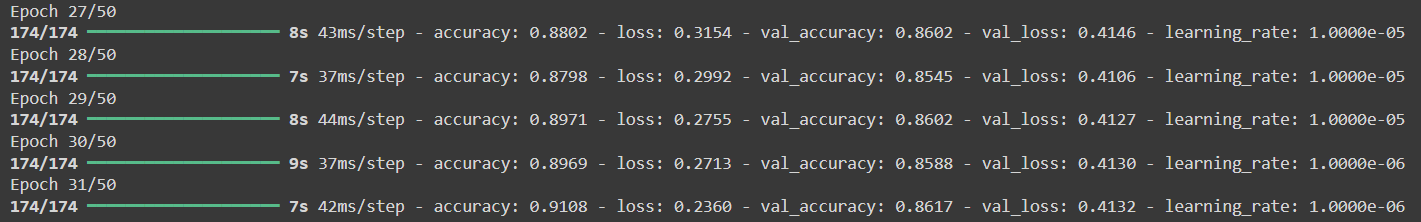

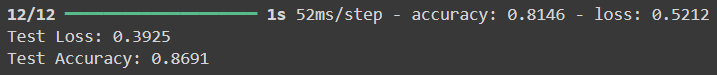

After training, the model achieved a test loss of 0.3925 and a test accuracy of 0.8691. These metrics indicate a solid performance, demonstrating the model's ability to generalize well to unseen data.

Once the model was fully trained, the Trainer class was utilized to evaluate its performance further. Specifically, we calculated the Mean Average Precision (mAP), a critical metric for assessing the accuracy of classification tasks, especially in multi-class scenarios. This measure provides a comprehensive view of the model's precision across all classes.

Additionally, the Trainer class facilitated the plotting of the confusion matrix, which visually represents the model's performance by comparing predicted labels to actual labels. The confusion matrix highlights areas of strength and weakness in classification, enabling a better understanding of how well the model distinguishes between different classes.

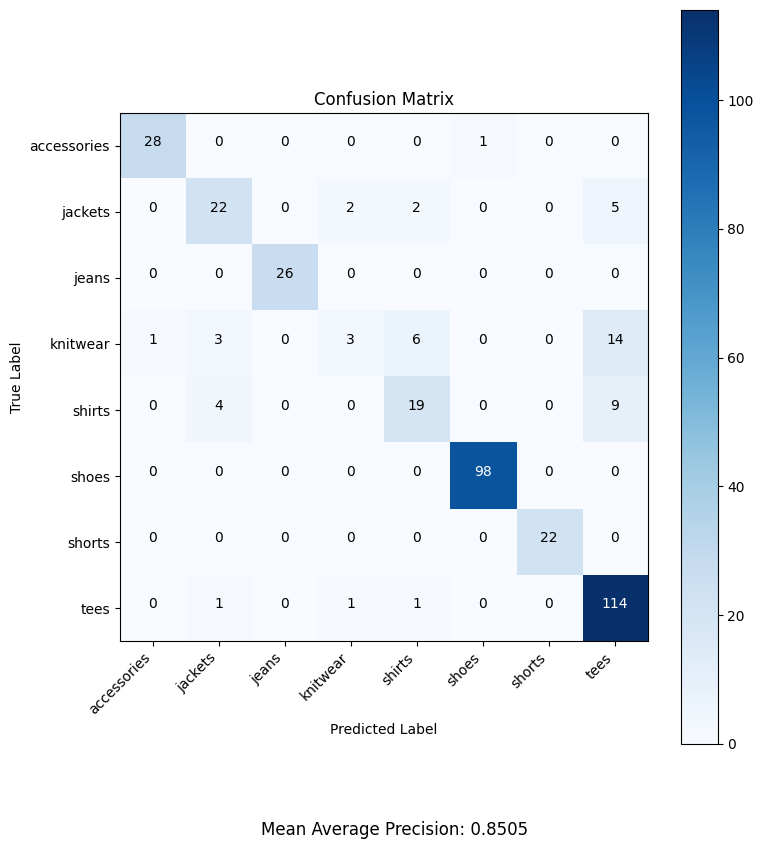

# **Question 2**

After doing some preliminary research on the VGG16 architecture, our model is designed as follows:

## **VGG16 architecture**

The VGG16 architecture is a popular deep learning model used for image recognition tasks. It was proposed by the Visual Geometry Group (VGG) at Oxford, hence the name. VGG16 refers to a version with 16 layers consisting of convolutional and fully connected layers.

## 1. **Input Layer**
  * The input to the model is an image of size 224 x 224 x 3, where 224x224 pixels represent the spatial dimensions, and the 3 channels correspond to the RGB color format.

## 2. **Convolutional Layers**
  * The VGG16 architecture is characterized by its use of small receptive fields, specifically 3x3 convolutional filters, with a stride of 1 and appropriate padding to maintain spatial resolution. After each block of convolutional layers, max pooling with a size of 2x2 is applied to downsample the spatial dimensions. The architecture consists of five distinct convolutional blocks:

   - **Block 1**:
     - Conv layer (3x3, 64 filters)
     - Conv layer (3x3, 64 filters)
     - Max pooling (2x2)
   - **Block 2**:
     - Conv layer (3x3, 128 filters)
     - Conv layer (3x3, 128 filters)
     - Max pooling (2x2)
   - **Block 3**:
     - Conv layer (3x3, 256 filters)
     - Conv layer (3x3, 256 filters)
     - Conv layer (3x3, 256 filters)
     - Max pooling (2x2)
   - **Block 4**:
     - Conv layer (3x3, 512 filters)
     - Conv layer (3x3, 512 filters)
     - Conv layer (3x3, 512 filters)
     - Max pooling (2x2)
   - **Block 5**:
     - Conv layer (3x3, 512 filters)
     - Conv layer (3x3, 512 filters)
     - Conv layer (3x3, 512 filters)
     - Max pooling (2x2)

3. Fully Connected Layers
After the final convolutional block, the output feature maps are flattened into a single vector. This flattened output is then passed through a series of fully connected layers:

  - FC1: **4096 neurons**, ReLU activation
  - FC2: **4096 neurons**, ReLU activation
  - FC3: **8 neurons**, corresponding to the 8 classification labels

## Summary:
- **13 Convolutional Layers**
- **3 Fully Connected Layers**
- **Max Pooling** applied after every block
- **ReLU Activation** function used after each layer to introduce non-linearity

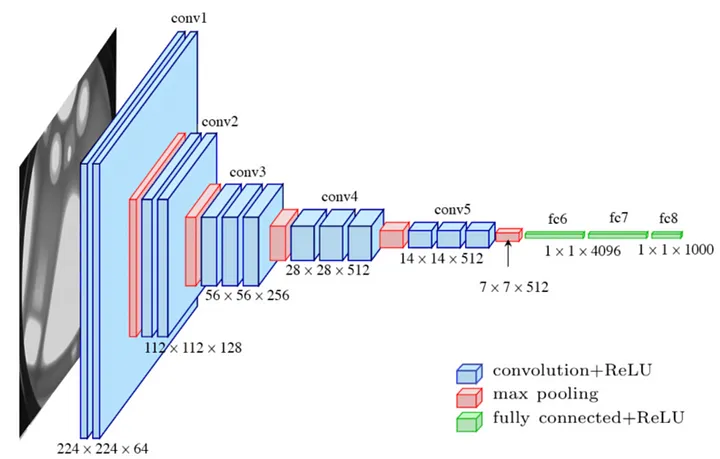

*Source: Researchgate.net*

## **Hyper-Parameter Tuning**

To optimize the performance of the model, extensive tests were conducted to determine the best optimizer and learning rate. The following hyperparameters were employed in the tuning process, consistent with the settings used in the previous question (Q1):

 * Number of Epochs: 5
 * Batch Size: 16
 * Learning Rate: 1e-04
 * Optimizer: Adam
 * Loss Function: Categorical Crossentropy


### **Optimizer Selection**

Consistent with the findings from the MLP model, the Adam optimizer was identified as the most effective choice for this model as well. The Adam optimizer's adaptive learning rate capabilities allow it to efficiently navigate the loss landscape, leading to faster convergence and improved performance in training deep learning models. Its combination of momentum and scaling helps to stabilize the training process, making it a robust option for various architectures, including convolutional neural networks like VGG16.

Interestingly, the different types of optimizers demonstrated a more pronounced effect on the performance of the VGG model compared to the MLP used in Q1. Among the optimizers tested, Adam, AdamW, and RMSprop exhibited superior performance, contributing to faster convergence and improved accuracy in the VGG architecture.

In contrast, SGD and Adagrad performed significantly worse, struggling to achieve optimal training dynamics and often leading to slower convergence rates. This disparity highlights the importance of selecting the appropriate optimizer based on the specific architecture and problem domain, particularly in deep learning models like VGG16, where the complexity and depth of the network can amplify the impact of optimization strategies.

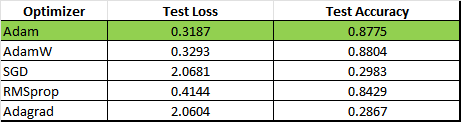

### **Learning Rate Selection**

Similar to the findings with the MLP model, the sweet spot for the learning rate in the VGG model was identified as 1e-04. Learning rates higher or lower than this value exhibited a marked difference in model performance, affecting both stability and convergence.

Notably, the impact of the learning rate on the VGG model was found to be more pronounced compared to the MLP model discussed in Q1. For instance, at a learning rate of 1e-01, the model's loss rate failed to return any meaningful value, underscoring the critical role that learning rate plays in training different model architectures. This observation emphasizes the necessity of carefully tuning hyperparameters, particularly in deeper networks like VGG16, where even slight variations can significantly affect training outcomes.

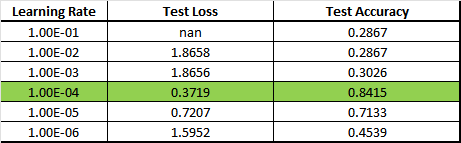

## **TensorBoard Graphs**

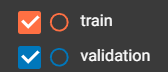

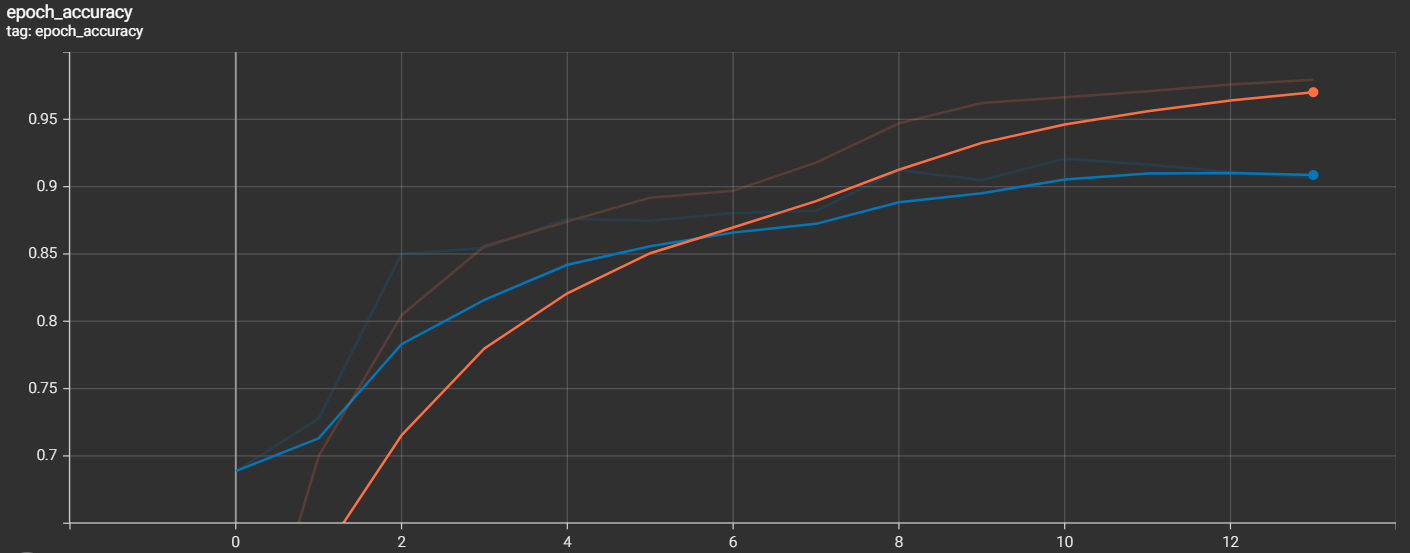

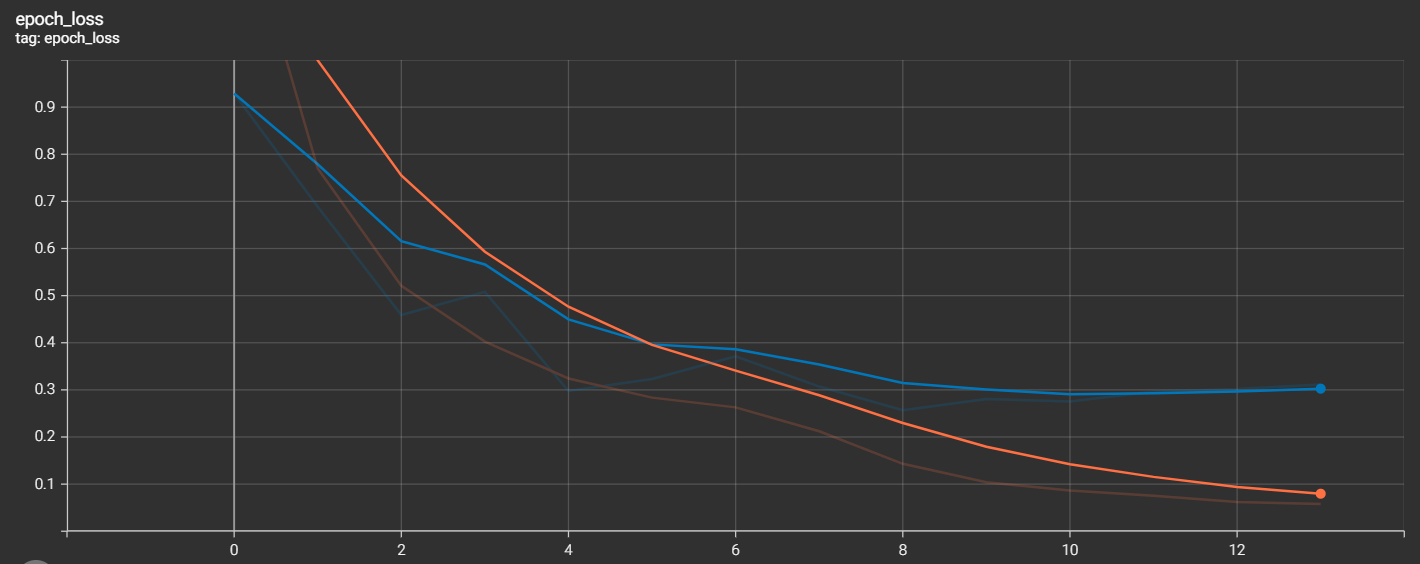

## **Training and Evaluation**

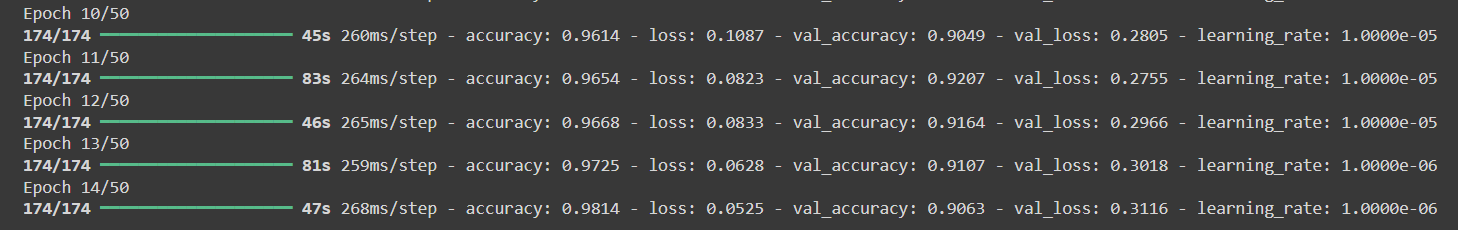

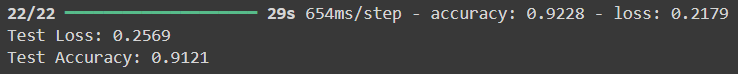

With the optimal hyperparameters established, the model training commenced using the following three callbacks, consistent with those implemented in Q1:

 * TensorBoard: For logging the training process and subsequent visualization of metrics.
 * Reduce Learning Rate on Plateau: To adjust the learning rate when the validation loss plateaus, aiding in continued convergence.
 * Early Stopping: To halt training if the validation loss does not show significant improvement over a specified number of epochs, preventing overfitting.

Through the implementation of these callbacks, the model achieved a test loss of 0.2569 and an accuracy of 0.9121 at epoch 14. Following training, the Trainer class was utilized to compute precision metrics and plot the confusion matrix, providing further insights into model performance.

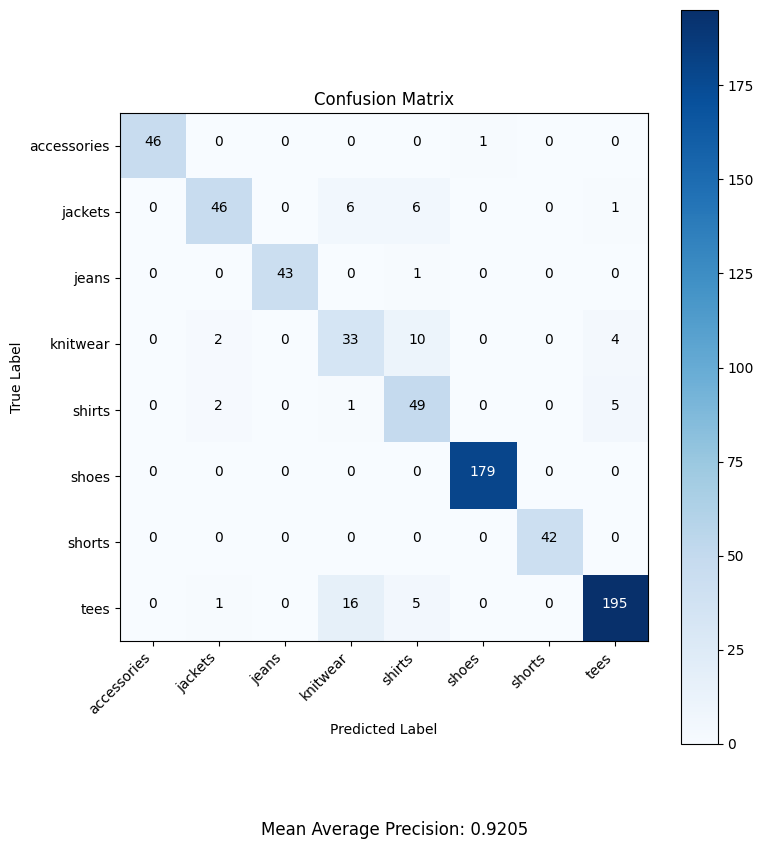

# **Question 3**

## **Hyper-Parameter Tuning**

To optimize the performance of the model, extensive tests were conducted to determine the best optimizer and learning rate. The following hyperparameters were employed in the tuning process, consistent with the settings used in the previous questions (Q1 & Q2):

 * Number of Epochs: 5
 * Batch Size: 16
 * Learning Rate: 1e-04
 * Optimizer: Adam
 * Loss Function: Categorical Crossentropy




### **Optimizer Selection**

Consistent with the findings from Q1 and Q2, the Adam optimizer was identified as the most effective choice for this model as well.

When comparing the optimizers' performance, a key observation is that the VGG model consistently outperformed the MLP model. However, using a pretrained VGG model further improved performance, achieving better metrics than the custom model developed in Q2. This highlights the advantages of leveraging pretrained models for complex tasks like image classification, where transfer learning can offer a significant boost.

Additionally, the pronounced difference between optimizer performances observed in the non-pretrained VGG (Q2) and the MLP (Q1) appears to be diminished when using the pretrained model. This suggests that pretrained models may reduce the sensitivity to hyperparameter tuning, particularly in terms of optimizer selection, due to the model's prior training on a large dataset.

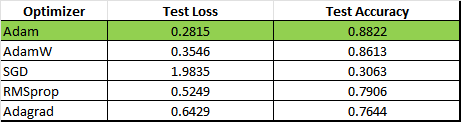

### **Learning Rate Selection**

Similar to the findings in Q1 and Q2, the sweet spot for the learning rate in the VGG model was identified as 1e-04. Learning rates higher or lower than this value exhibited a marked impact on model performance, influencing both stability and convergence.

When comparing the loss and accuracy results between the custom VGG model created in Q2 and the pretrained VGG model in Q3, there was no significant difference in most cases. However, at a learning rate of 1e-01, a key difference was noted: the custom VGG model in Q2 recorded NaN values for the loss, likely due to extremely large gradients causing numerical instability. In contrast, the pretrained VGG model in Q3 produced predictably large loss values instead of NaN.

This discrepancy may be attributed to the different frameworks used in the two cases. Q2 utilized TensorFlow/Keras, while Q3 was built on PyTorch, which may handle numerical instability and large gradient calculations differently. This highlights the importance of framework-specific behavior when tuning hyperparameters like the learning rate, particularly in complex models like VGG.

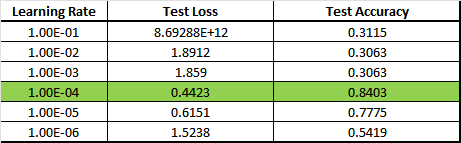

## **TensorBoard Graphs**

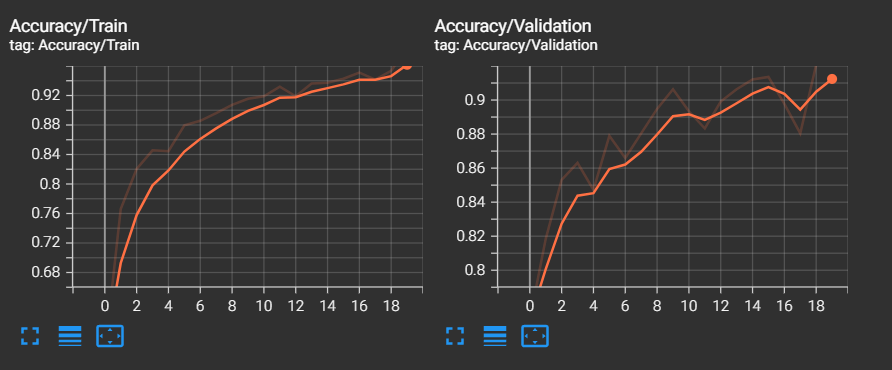

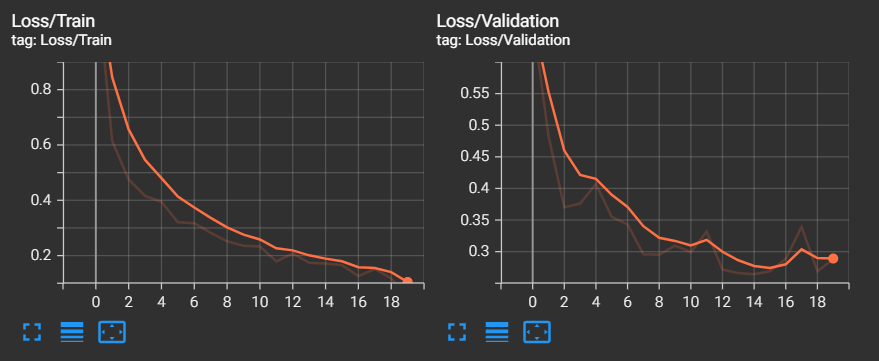

## **Training and Evaluation**


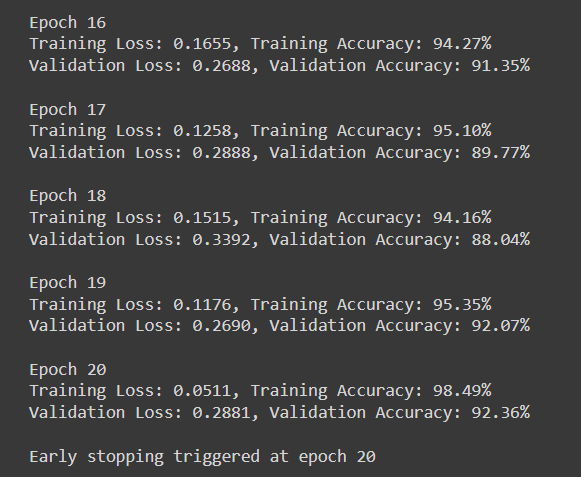

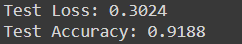


With the optimal hyperparameters established, the model training commenced using the following three callbacks, consistent with those implemented in Q1 & Q2:

TensorBoard: For logging the training process and subsequent visualization of metrics.
Reduce Learning Rate on Plateau: To adjust the learning rate when the validation loss plateaus, aiding in continued convergence.
Early Stopping: To halt training if the validation loss does not show significant improvement over a specified number of epochs, preventing overfitting.

Through the implementation of these callbacks, the model achieved a test loss of 0.3024 and an accuracy of 0.9188 at epoch 20. Following training, the Trainer class was utilized to compute precision metrics and plot the confusion matrix, providing further insights into model performance.

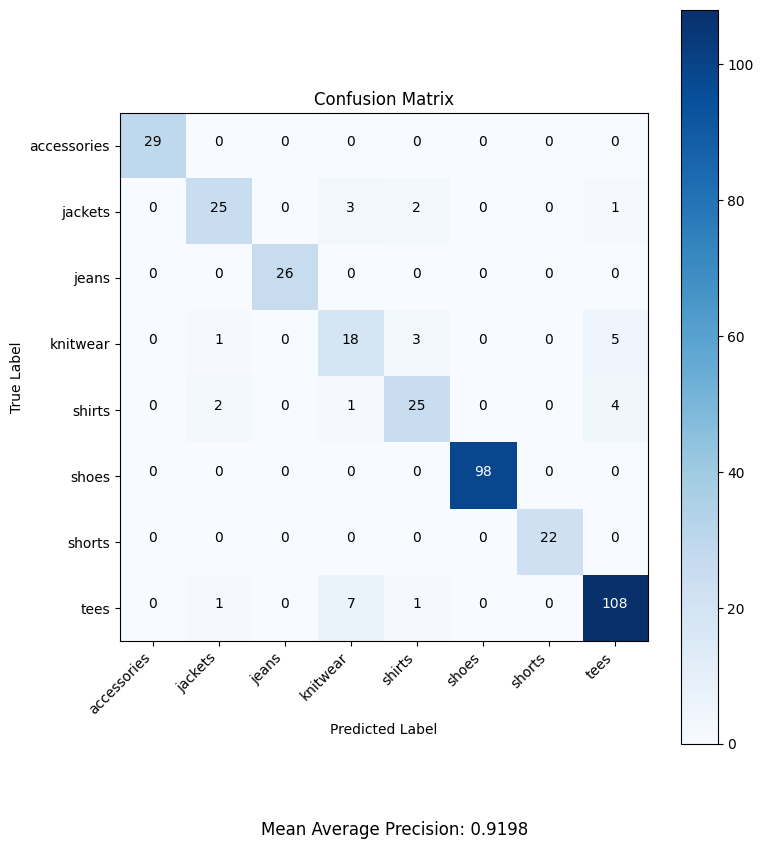

# **Overall Evaluation**

## **Architectural Differences**
From the testing and evaluation done across the three models—MLP in Q1, VGG16 in Q2, and pretrained VGG16 in Q3—it is evident that the VGG16 models outperformed the MLP model from Q1. This performance boost can be attributed to the increased complexity of the VGG16 architecture, which involves significantly more neurons and layers. Additionally, VGG16 benefits from the use of convolutional layers, a key feature of convolutional neural networks (CNNs), which allows the model to extract spatial features from images more effectively. In contrast, the MLP relies solely on fully connected layers, which may limit its ability to capture such complex patterns.



## **Hyper-parameter Observations**

**Number of Neurons**

In Q1, experiments showed a direct correlation between the number of neurons and the model’s accuracy and loss rate. However, increasing the number of neurons also demanded more computational resources, leading to diminishing returns in performance. This indicates that more neurons do not always equate to better results—finding the optimal number of neurons is essential to balance performance and resource consumption. The optimal number can vary depending on factors like the architecture used and the specific problem being solved, reinforcing the need for targeted experimentation.

**Optimizer Differences Between Models**

When comparing optimizers across the MLP model in Q1 and the VGG16 models in Q2 and Q3, it became clear that different architectures respond differently to optimizers. In particular, the VGG models showed more pronounced differences in performance when testing various optimizers. This highlights the importance of selecting the right optimizer for the architecture being used. The MLP's simpler structure showed smaller differences between optimizers, while the VGG model's depth and complexity amplified the differences in optimizer performance, particularly between SGD, Adam, and RMSprop.

**Most Optimal Optimizer**

Across all experiments, Adam proved to be the most optimal optimizer. This can be attributed to several key features:

1. Adaptive Learning Rate: Adam adjusts the learning rate for each parameter individually, allowing it to scale updates based on the size of the gradients. This helps maintain stability across different models and datasets.

2. Bias Correction: In the early stages of training, Adam corrects for bias in its estimates of the first and second moments. This results in more accurate updates early in training, improving convergence.

3. Combination of Momentum and RMSprop: By combining momentum and RMSprop, Adam accelerates convergence and stabilizes updates, making it suitable for a wide range of problems and architectures.

**Learning Rate**

In all three models, the most optimal learning rate was found to be 1e-04. Deviation from this learning rate, either higher or lower, negatively impacted the model’s performance.

- Learning Rate Too High: When the learning rate is too high, the updates to the weights are excessively large, causing the model to overshoot the optimal parameters during gradient descent. This results in oscillations or divergence, preventing the model from converging to a solution.

- Learning Rate Too Low: When the learning rate is too low, the model makes small, incremental updates to the weights. This slows down the training process significantly, making convergence impractically slow, though it may eventually reach a solution.

The consistency of 1e-04 as the optimal learning rate across all models suggests that this rate strikes the right balance between convergence speed and stability, allowing the models to optimize efficiently without encountering issues like overshooting or slow convergence.